# Interactive Python-Pandas-Jupyter Tutorial
The New York Times has made their [COVID-19 data available on GitHub](https://github.com/nytimes/covid-19-data). Note there is more detailed data from [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19) as well, but the NY Times data focus on just US States and counties in an easy to read format which makes it ideal for a tutorial.

## Disclaimer
**WARNING!** This notebook is only a tutorial, and not a factual study of COVID-19. I am not an epidemiologist. I am only a data analyst who studies solar energy. I understand that these are very upsetting issues to deal with, and they upset me too. Many lives have been lost to COVID-19, and this tutorial will not help bring back those lives and will not help bring an end to this pandemic. I'm very sorry.

## Purpose
Why you ask? In my opinion we are confronting the greatest existential threat since [WW2](https://en.wikipedia.org/wiki/World_War_II). I believe it's natural to feel strong emotions like anger, sorrow, frustration, and fear. I think one possible coping mechanism for dealing with these feelings could be learning more about the extent and rapid changes in the spread of COVID-19, and possibly gain some perspective and understanding. Although our futures' now seem impossibly out of control, and I think it would be misguided to expect that we could accurately predict what the future will hold, but nevertheless, playing with the data may give us some relief and a tiny sense of control at least over the immediate and what has already past.

## Method
How you ask? This is a [Jupyter notebook](https://jupyter.org/) running online in [MyBinder](https://mybinder.org/). You can run all of the calculations in this Jupyter notebook with nothing but an internet connection and a browser. You do not need to install anything, no Python, no Git, no nothin'. You just need to know how to run the notebook. The notebook is divided into **cells** which can have either text or code. Code cells may be followed by output. To execute a cell do one of the following:

* click the **Run** button in the tool bar,
* select **Cell > Run** from the menu, or
* press Shift+Enter on your keyboard

**_WARNING_**: Cells in a Jupyter notebook can be executed in any order, but the state of the notebook will be changed after each execution. Therefore it's best to run the cells from top to bottom. You can clear and run all of the cells by selecting **Kernel > Restart & Run All** from the menu.

Feel free to explore the notebook. Mess it up as much as you want and then restart MyBinder anytime with a fresh copy.

## Overview
Here're some of the things we'll cover in this tutorial:

* reading and parsing CSV data from a file using Pandas
* the difference between wide and tidy or narrow dataframes
* data mining, sorting, filtering, pivoting tables, and aggregation functions like groupby and sum
* data visualization, making scatter plots, line plots, and bar plots
* least-squares fitting using NumPY
* using minimize from the Scipy Optimization library to fit coefficients to a non-linear function like the SEIR model or a Guassian PDF

## Python
OK! Let's get started. This notebook uses [Python](https://www.python.org/) and the [Python Pandas package](https://pandas.pydata.org/) to manipulate the New York Times COVID-19 data. We'll also use a few extra Python packages which we need to import into our notebook first.

In [1]:
# this is a code cell

# invoke Jupyter magic commands to make plots inline 
%matplotlib inline

# now inport Python packages we need
from matplotlib import pyplot as plt  # matplotlib is a plotting library
import numpy as np                    # always use NumPy for array math in Python
import pandas as pd                   # Pandas is a data management tool
import seaborn as sns                 # seaborn just makes plots look nice
# SciPy optimization library
from scipy.optimize import minimize

sns.set(font_scale=1.5)

## States
Let's look at the states data first because it has less columns and so it's easier to parse.

### Tidy vs. Wide
The NY Times data is organized by date in what's often called a [tidy or narrow format](https://en.wikipedia.org/wiki/Wide_and_narrow_data). That means that in the states column, each state is a category, which is then repeated as many times as is necessary. This format has many advantages:
* efficient because any days with no data for a category are not included in the table
* easy to filter for a category by finding the indices where the states column includes the desired filter
* facilitates group-by and other aggregates, by selecting the category to aggregate on

### Getting and parsing the data
This is the first step, and Pandas makes it super easy with several `read_*` methods, see [Pandas io user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). Since this is delimnited data we use [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [2]:
# parse the NY Times data comma-separated values (CSV) file called "us-states.csv"
# and set the index to the date column 
states = pd.read_csv('us-states.csv', index_col='date')
states.head()  # show the first few rows of the data

,state,fips,cases,deaths
date,,,,
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0


In [3]:
latest_data = states.index[-1]
latest_data

'2020-04-28'

In [4]:
# use pandas date offsets
timestamp_2weeks = pd.to_datetime(latest_data) - pd.to_timedelta('14D')
two_weeks = str(timestamp_2weeks.date())
two_weeks

'2020-04-14'

In [5]:
# pivot the states data to get the deaths for each state by date
deaths = states.pivot(columns='state', values='deaths')

# show the deaths in CA, NY, & WA from March 16th to the 27th
deaths[two_weeks:latest_data][['California', 'New York', 'Washington']].T

# for more information about Pandas DataFrame pivot, see the documentation:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

date,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
state,,,,,,,,,,,,,,,
California,778.0,885.0,971.0,1050.0,1146.0,1176.0,1223.0,1316.0,1425.0,1553.0,1619.0,1692.0,1716.0,1800.0,1884.0
New York,10834.0,11586.0,12192.0,12822.0,13362.0,13869.0,14347.0,14828.0,15302.0,15740.0,16162.0,16599.0,16966.0,17303.0,17638.0
Washington,552.0,572.0,588.0,610.0,629.0,637.0,661.0,683.0,696.0,717.0,731.0,743.0,757.0,771.0,792.0


In [6]:
# get the total deaths for each state
total_deaths = deaths.max()

# sort and show worst 10 states
total_deaths.T.sort_values(ascending=False).head(10) 

state
New York         17638.0
New Jersey        6442.0
Michigan          3566.0
Massachusetts     3153.0
Illinois          2132.0
Pennsylvania      2092.0
Connecticut       2089.0
California        1884.0
Louisiana         1758.0
Florida           1170.0
dtype: float64

In [7]:
# describe the statistics
total_deaths.describe()

count       55.000000
mean       964.363636
std       2552.209293
min          2.000000
25%         57.000000
50%        225.000000
75%        795.500000
max      17638.000000
dtype: float64

In [8]:
# total deaths from COVID-19 in US
print(f"Total number of Americans lost to COVID-19: {total_deaths.sum():g}")

Total number of Americans lost to COVID-19: 53040


Text(0, 0.5, 'Total Deaths')

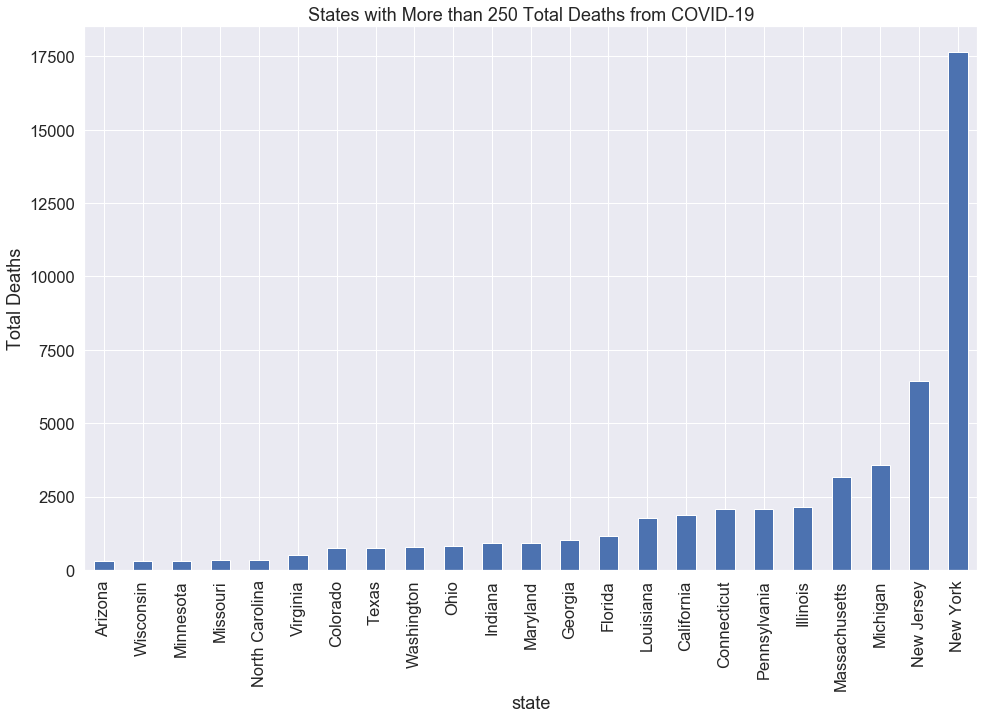

In [9]:
# create a filter for states with greater than N deaths
NDEAD = 250  # these are real people who had family and friends!
gt100_deaths_filter = total_deaths > NDEAD

# make a bar plot of the top states
total_deaths[gt100_deaths_filter].sort_values(axis=0).plot.bar(figsize=(16, 10))
plt.title(f'States with More than {NDEAD} Total Deaths from COVID-19')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths')

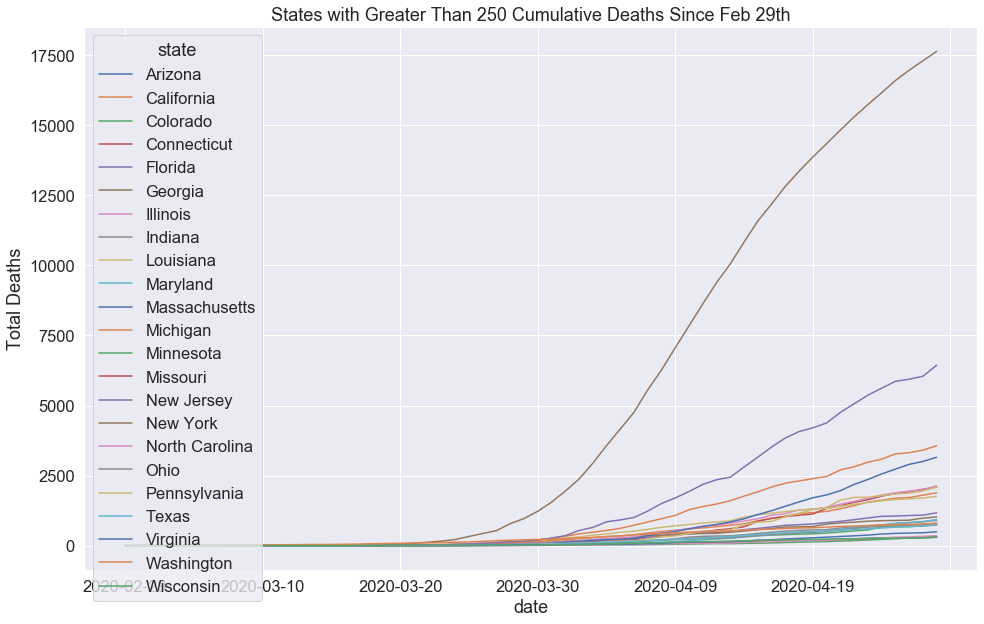

In [10]:
# get a list of the states with greater than 100 deaths
gt100_deaths_states = deaths.columns[gt100_deaths_filter] 

# plot the cumulative deaths since Feb 29th
feb29 = '2020-02-29'
deaths[feb29:latest_data][gt100_deaths_states].plot(figsize=(16, 10))
plt.title(f'States with Greater Than {NDEAD} Cumulative Deaths Since Feb 29th')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths (thick dashed line is total for all states)')

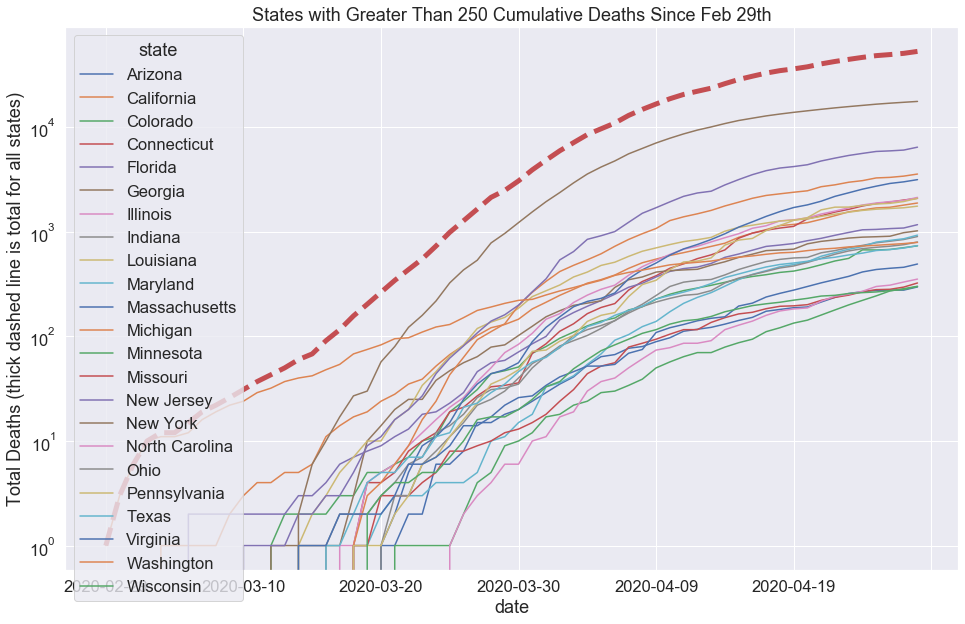

In [11]:
# plot on a log scale
ax = deaths[feb29:latest_data][gt100_deaths_states].plot(figsize=(16, 10), logy=True)

# share the axes with another plot of total deaths
deaths[feb29:latest_data].sum(axis=1).plot(axes=ax, linewidth=5, linestyle='dashed')
plt.title(f'States with Greater Than {NDEAD} Cumulative Deaths Since Feb 29th')
plt.ylabel('Total Deaths (thick dashed line is total for all states)')

## California
Let's take a closer look at California and try to see if it fits an exponential growth

In [12]:
# get a time series of the California deaths
california = deaths['California']
california.head()

date
2020-01-21    NaN
2020-01-22    NaN
2020-01-23    NaN
2020-01-24    NaN
2020-01-25    0.0
Name: California, dtype: float64

In [13]:
# days with more than 1 death (non-zero deaths)
nz_ca = california[california > 0]

# find day zero for California
zero_day = nz_ca.index[0]
print(f'day zero is {zero_day}')

nz_ca  # display the list

day zero is 2020-03-04


date
2020-03-04       1.0
2020-03-05       1.0
2020-03-06       1.0
2020-03-07       1.0
2020-03-08       1.0
2020-03-09       2.0
2020-03-10       3.0
2020-03-11       4.0
2020-03-12       4.0
2020-03-13       5.0
2020-03-14       5.0
2020-03-15       6.0
2020-03-16      11.0
2020-03-17      14.0
2020-03-18      17.0
2020-03-19      19.0
2020-03-20      24.0
2020-03-21      28.0
2020-03-22      35.0
2020-03-23      39.0
2020-03-24      52.0
2020-03-25      67.0
2020-03-26      82.0
2020-03-27     102.0
2020-03-28     121.0
2020-03-29     130.0
2020-03-30     146.0
2020-03-31     183.0
2020-04-01     212.0
2020-04-02     247.0
2020-04-03     282.0
2020-04-04     323.0
2020-04-05     349.0
2020-04-06     386.0
2020-04-07     447.0
2020-04-08     506.0
2020-04-09     548.0
2020-04-10     594.0
2020-04-11     632.0
2020-04-12     676.0
2020-04-13     725.0
2020-04-14     778.0
2020-04-15     885.0
2020-04-16     971.0
2020-04-17    1050.0
2020-04-18    1146.0
2020-04-19    1176.0
2020-04-

In [14]:
# calculate the least squares fit in the form y = mx + b 
# where x are the number of days since day zero
days = pd.DatetimeIndex(nz_ca.index) - np.datetime64(zero_day, 'D')

# days is a timedelta in nanoseconds, convert to days as floats
x = (days.values/3600/24/1e9).astype(float)  # days
ndays = x.size  # how many days in day zero?

# append a column of constants [1] to get a constant "b"
A = np.concatenate([x.reshape([ndays, 1]), np.ones([ndays, 1])], axis=1)

x  # display the list of days as floats

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55.])

In [15]:
# if death rate is exponential, then in logspace it's a straight line
log_nz_ca = np.log(nz_ca.values)
log_nz_ca  # display list of non-zero CA deaths in logspace

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.69314718, 1.09861229, 1.38629436, 1.38629436, 1.60943791,
       1.60943791, 1.79175947, 2.39789527, 2.63905733, 2.83321334,
       2.94443898, 3.17805383, 3.33220451, 3.55534806, 3.66356165,
       3.95124372, 4.20469262, 4.40671925, 4.62497281, 4.79579055,
       4.86753445, 4.98360662, 5.20948615, 5.35658627, 5.50938834,
       5.64190707, 5.77765232, 5.85507192, 5.95583737, 6.10255859,
       6.22653667, 6.30627529, 6.38687932, 6.44888939, 6.51619308,
       6.58617165, 6.65672652, 6.78558765, 6.87832647, 6.95654544,
       7.0440329 , 7.06987413, 7.10906214, 7.18235211, 7.26192709,
       7.34794382, 7.38956395, 7.43366654, 7.44775128, 7.49554194,
       7.54115246])

In [16]:
# calcuate least squares fit for y = mx + b,
# y is the log of deaths, x is days since day zeroprint(f'RMSE: {np.exp(np.sqrt(result[1]/ndays))} deaths')
result = np.linalg.lstsq(A, log_nz_ca, rcond=None)

# get the coefficients for the result
m, b = result[0]
print(f'y = mx+b, m={m:g}, b={b:g}')
print(f'RMSE: {np.exp(np.sqrt(result[1]/ndays))} deaths')

# for more information on NumPy Linear Algebra Least Squares see:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq

y = mx+b, m=0.146452, b=0.569592
RMSE: [1.73699606] deaths


In [17]:
# try Gaussian
x_vec = x.reshape([ndays, 1])
x2_vec = x_vec*x_vec
const_vec = np.ones([ndays, 1])

# append a column of constants [1] to get a constant "b"
A2 = np.concatenate([x2_vec, x_vec, const_vec], axis=1)

# calcuate least squares fit for y = mx + b,
# y is the log of deaths, x is days since day zero
result = np.linalg.lstsq(A2, log_nz_ca, rcond=None)

# get the coefficients for the result
a = result[0]
print(f'y = a2*x^2 + a1*x + a0, a2={a[0]:g}, a1={a[1]:g}, a0={a[2]:g}')
print(f'RMSE: {np.exp(np.sqrt(result[1]/ndays))} deaths')

y = a2*x^2 + a1*x + a0, a2=-0.00228189, a1=0.271956, a0=-0.559942
RMSE: [1.15530151] deaths


In [18]:
# day 24 fit
m24 = 0.217197
b24 = -0.360004
y24 = np.exp(x*m24 + b24)

Text(0, 0.5, 'Total CA Deaths')

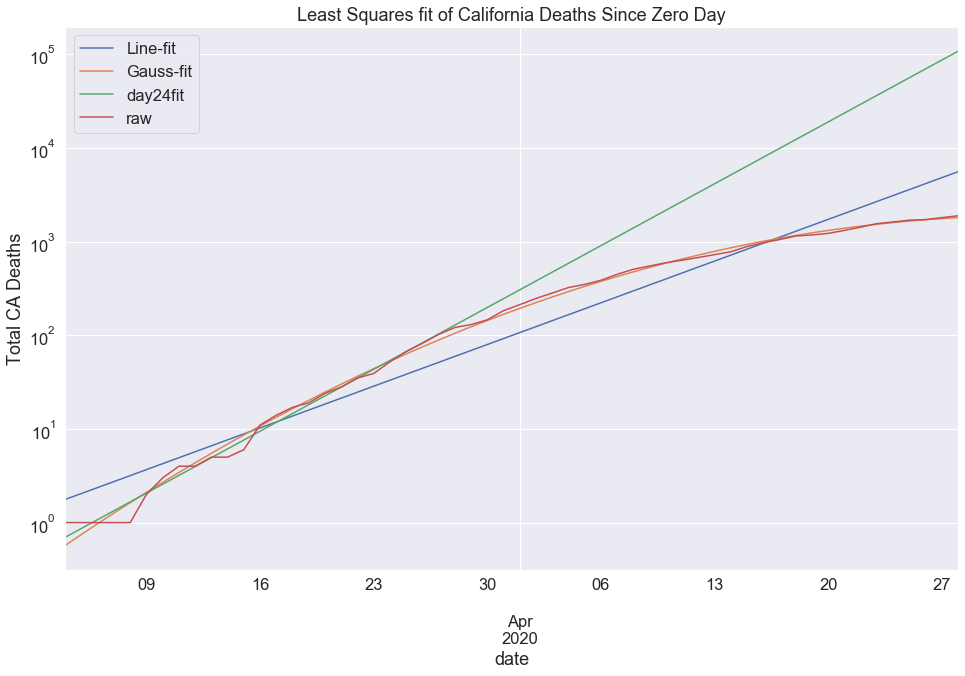

In [19]:
# calculate the fitted deaths, and compare to the NY Times data
y = np.exp(x*m + b)  # fit number of CA deaths
y2 = np.exp(np.dot(A2,a))
# get the days as dates and create a Pandas DataFrame for convenience
fit_days = pd.DatetimeIndex(pd.Timestamp(zero_day) + days)
ca_fit = pd.DataFrame(
    {'Line-fit': y, 'Gauss-fit': y2, 'day24fit': y24, 'raw': nz_ca.values}, index=fit_days)

# make a log-plot
ca_fit.plot(logy=True, figsize=(16, 10))
plt.title('Least Squares fit of California Deaths Since Zero Day')
plt.ylabel('Total CA Deaths')

Text(0, 0.5, 'Total CA Deaths')

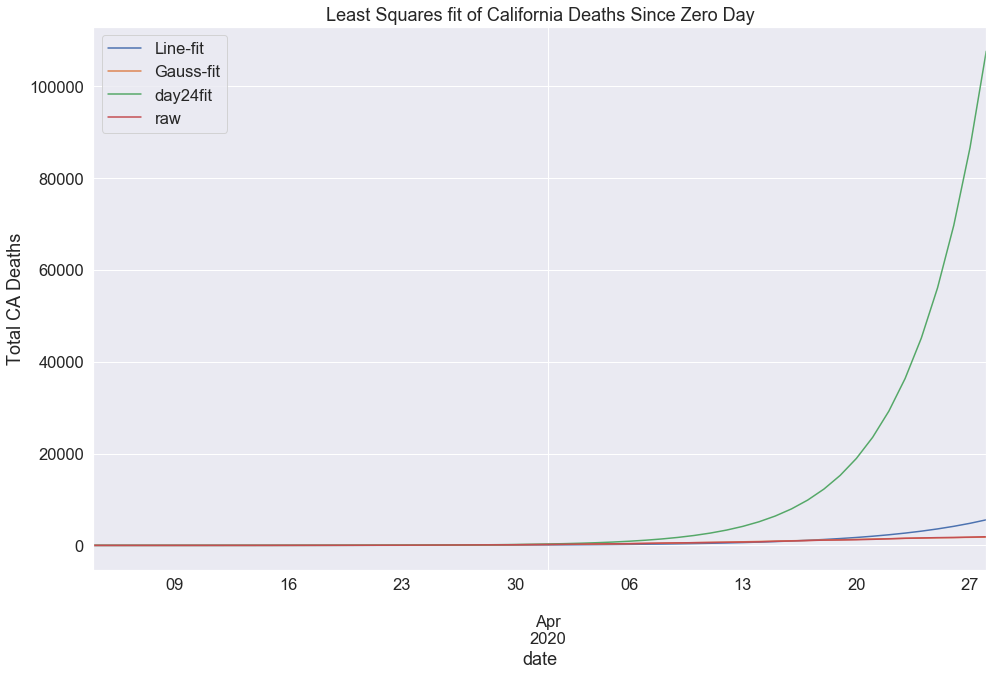

In [20]:
# plot in linear space
ca_fit.plot(figsize=(16, 10))
plt.title('Least Squares fit of California Deaths Since Zero Day')
plt.ylabel('Total CA Deaths')

## Conclusions
The only conclusion we can draw from this fit, is that the growth is very clearly exponential. After monitoring the daily deathtoll and comparing it to the exponential we calculated on March 29th (day 24), eventially we saw the slope change and start to fall below the exponential growth. This signals the end of exponential growth, and a shift to a sigmoid which epidemiologist have indicated is the expected pattern (see [IMHE](https://covid19.healthdata.org) projections).

### Fits
Neither a linear or Guassian fit is physically meaningful. The death rate can't grow indefinitely, because eventually everyone would be dead. Especially an exponetially growing death rate. Also the number of deaths are cumulative, so the total dead can't decrease. The death rate should be a sigmoid or logistic shape, and the cumulative dead should asymptote as the death rate approaches it's maximum.

#### Linear
The linear fit is only useful for the first portion of the plot when the growth is exponential. It's only useful to demonstate that the grow is indeed exponential. That's the most important thing we can obtain from it.

#### Gaussian
The Gaussian curve fits well, but is really out of place in the cumulative data. We should apply it to the daily dead, not the cumulative. To make sure the fit quits, let's look for the maximum.

$\begin{aligned}
y &= a_0 x^2 + a_1 x + a_2 \\
dy/dx &= 2 a_0 x + a_1 \\
\left. dy/dx \right|_{x_\max} &= 0 \\
    x_\max &= -\frac{a_1}{2 a_0}
\end{aligned}$

In [21]:
# find max
x_max = -a[1] / 2 / a[0]
print(f'Gauss fit max at x = {x_max:g}')

Gauss fit max at x = 59.59


In [22]:
# test the Guass fit
ntest = 1 + (x_max - x[-1]).astype(int)
print(f'number of test days: {ntest}')
xtest = np.arange(x[-1], x_max).reshape([ntest, 1])
x2test = xtest*xtest
A2test = np.concatenate([x2test, xtest, const_vec[:ntest]], axis=1)
y2test = np.exp(np.dot(A2test,a))
test_days = pd.DatetimeIndex(nz_ca.index)[-1] + days[:ntest]
ca_test = pd.DataFrame({'test': y2test,}, index=test_days) 

number of test days: 5


In [23]:
print(f'total CA test deaths on {ca_test.index[-1]}: {y2test[-1]:.0f}')

total CA test deaths on 2020-05-02 00:00:00: 1886


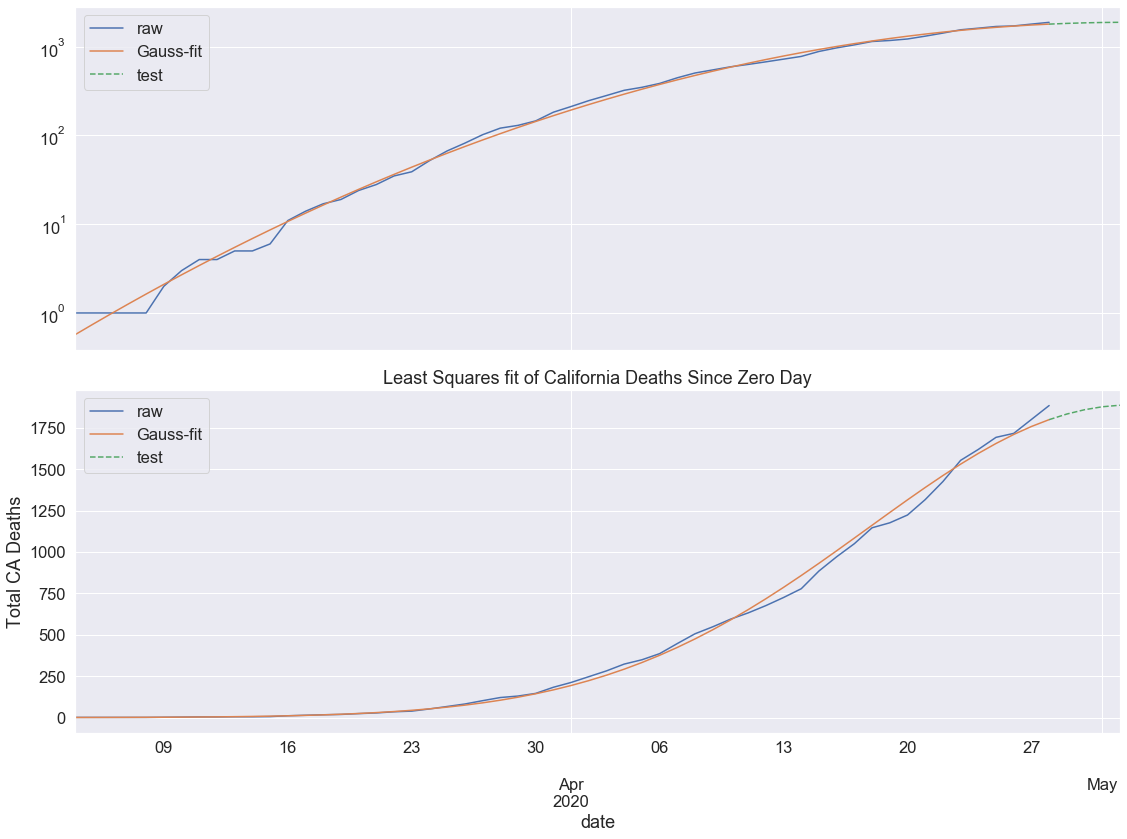

In [24]:
f, ax = plt.subplots(2, 1, sharex=True, figsize=(16, 12))
ca_fit[['raw', 'Gauss-fit']].plot(ax=ax[0], logy=True)
ca_test.plot(ax=ax[0], linestyle="dashed")
plt.title('Least Squares fit of California Deaths Since Zero Day')
plt.ylabel('Total CA Deaths')

ca_fit[['raw', 'Gauss-fit']].plot(ax=ax[1])
ca_test.plot(ax=ax[1], linestyle="dashed")
plt.title('Least Squares fit of California Deaths Since Zero Day')
plt.ylabel('Total CA Deaths')
f.tight_layout()

In [25]:
# deaths per day
daily_dead = np.diff(np.append(0, nz_ca.values))

# because some days have zero deaths, and log(0)-> Inf, then we can't use
# least-squares, so instead we use a minimize from SciPy optimization library

# first we define our objective function
# we'll use a Gaussian fit like we did above because it worked well enough
# WARNING: this is only a tutorial, and a Gaussian model is only used as an example

# NOTE: according to some expert epidemiologists, the SEIR model would be more appropriate 
# https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model
# The Institute for Health Metrics and Evaluation (IMHE) at the University of Washington
# (https://covid19.healthdata.org/) is using a SEIR model, see the section
# "WHAT’S IN THE DEVELOPMENT PIPELINE FOR IHME COVID-19 PREDICTIONS"
# http://www.healthdata.org/covid/updates

def gaussfit(a, x):
    shape, location, scale = a
    return shape * np.exp(-((x-location)/scale)**2 / 2) / np.sqrt(2*np.pi)

# NOTE: we could also use norm.pdf or norm.cdf from scipy.stats instead of writing it out
# https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.norm.html

# now we call minimize the RMSE of between the objective function: "gausefit"
# and the actual values we're trying to fit "daily_dead"
# RMSE = root-mean-square error
res = minimize(
    lambda a: np.sqrt(np.mean((daily_dead - gaussfit(a, x))**2)),  # RMSE
    x0=[160, 59, 14])                                              # initial guess
print(res)  # print results from minimize

# get the coefficients from the results
shape, location, scale = res.x

# now fit the daily dead using the objective and the coefficients
dead_fit = gaussfit((shape, location, scale), x)

      fun: 15.914489294600275
 hess_inv: array([[ 4.49289248e+02,  3.01056173e+01, -3.53473915e-01],
       [ 3.01056173e+01,  2.37626599e+01,  1.62192500e+01],
       [-3.53473915e-01,  1.62192500e+01,  1.52976220e+01]])
      jac: array([-1.19209290e-07,  1.19209290e-07,  3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 135
      nit: 25
     njev: 27
   status: 0
  success: True
        x: array([197.09230935,  49.56818463,  14.54615196])


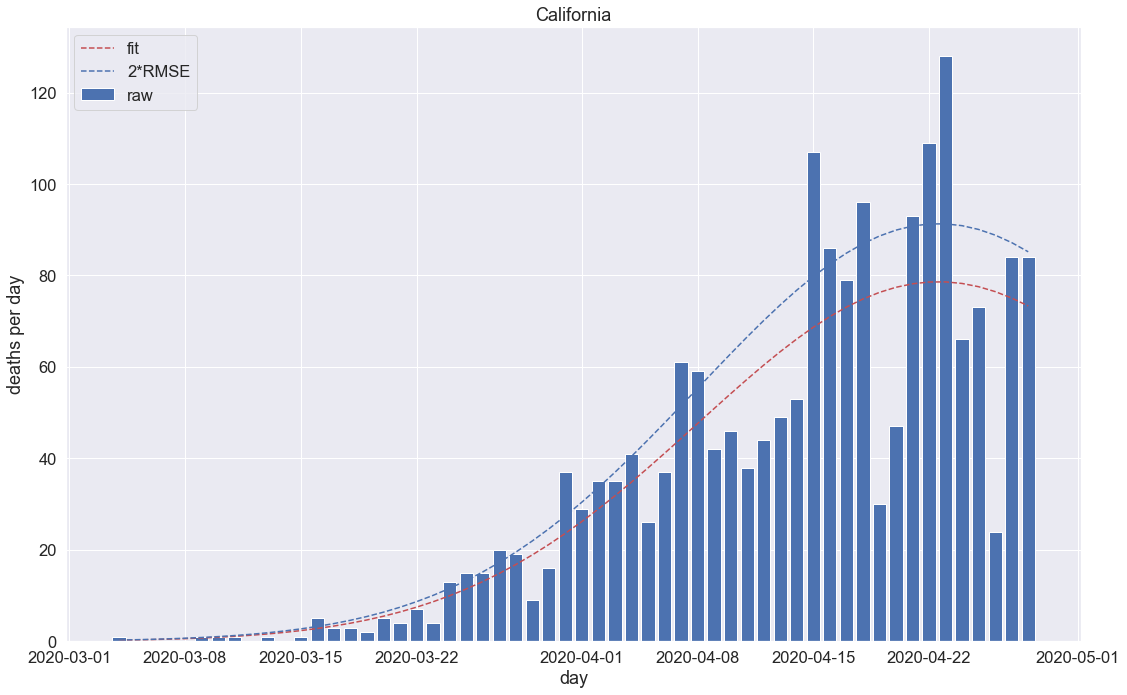

In [26]:
# is it flattening?
f = plt.figure(figsize=(16, 10))
plt.bar(fit_days, daily_dead)
plt.plot(fit_days, dead_fit, 'r--')
plt.plot(fit_days, (1 + 2*res.fun/shape) * dead_fit, 'b--')
plt.title('California')
plt.ylabel('deaths per day')
plt.xlabel('day')
plt.legend(['fit', '2*RMSE', 'raw'])
f.tight_layout()

## Counties
Let's take a look at the more detailed counties list.

In [27]:
# parse the NY Times data comma-separated values (CSV) file called "us-counties.csv"
# and set the index to the date column 
counties = pd.read_csv('us-counties.csv', index_col='date', parse_dates=True)
counties.head()  # show the first few rows of the data

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0


In [28]:
# create a filter for California
ca_filter = counties['state'] == 'California'
# apply the filter to get just the CA counties
ca_counties = counties[ca_filter]
# summarize the counties
ca_counties.drop('fips', axis=1).groupby('county').max().sort_values('deaths', ascending=False).head(20)

,state,cases,deaths
county,,,
Los Angeles,California,20976,1000
Riverside,California,3735,141
San Diego,California,3378,128
Santa Clara,California,2122,107
San Bernardino,California,1827,85
Alameda,California,1554,59
San Mateo,California,1099,48
Orange,California,2198,42
Sacramento,California,1053,41


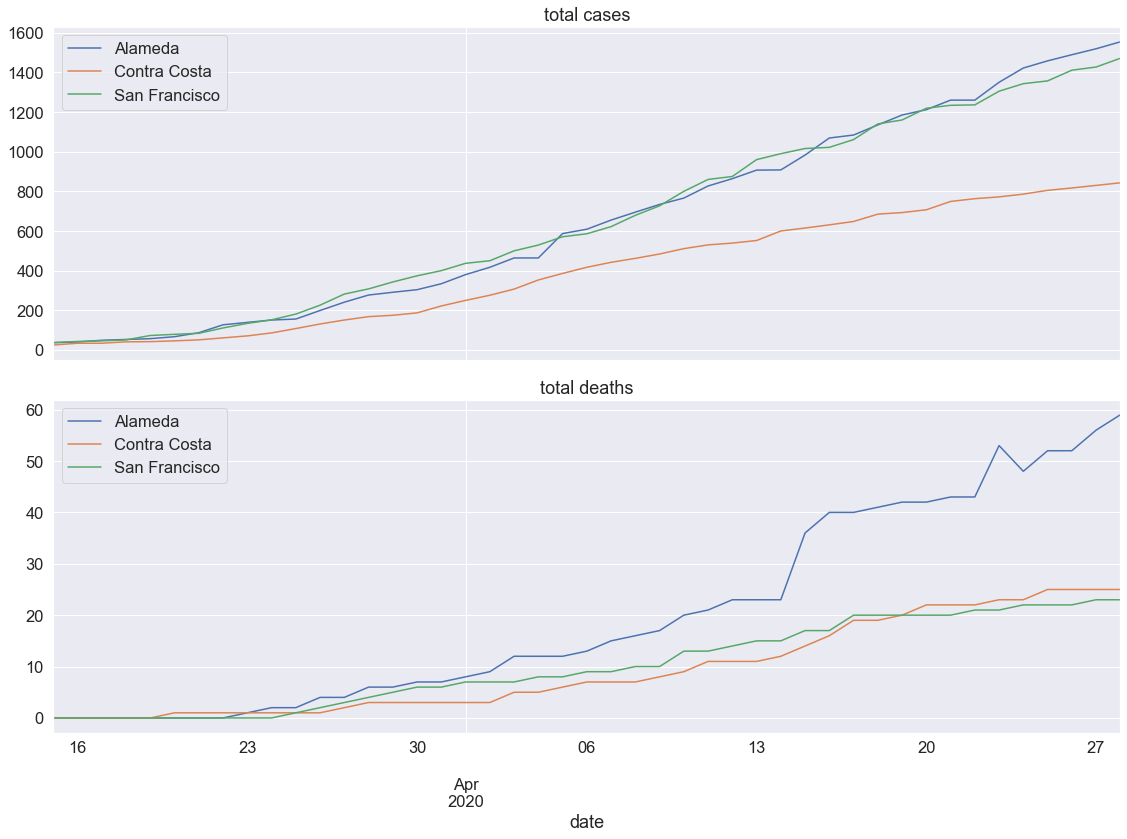

In [29]:
# make a figure with two stacked plots
f, ax = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# only starting from shelter in place
shelter_inplace = '2020-03-15'

# filter out Alameda, Contra Costa, and SF
alameda_filter = ca_counties['county'] == 'Alameda'
cc_filter = ca_counties['county'] == 'Contra Costa'
sf_filter = ca_counties['county'] == 'San Francisco'

# apply the filter to get just the bay area counties
alameda = ca_counties[alameda_filter].loc[shelter_inplace:]
contra_costa = ca_counties[cc_filter].loc[shelter_inplace:]
sanfran = ca_counties[sf_filter].loc[shelter_inplace:]

# plot cases in the top and the deaths below using the ax[idx]
alameda['cases'].plot(ax=ax[0])
alameda['deaths'].plot(ax=ax[1])
contra_costa['cases'].plot(ax=ax[0])
contra_costa['deaths'].plot(ax=ax[1])
sanfran['cases'].plot(ax=ax[0])
sanfran['deaths'].plot(ax=ax[1])

# make a legend, and tidy up!
bay_area = ('Alameda', 'Contra Costa', 'San Francisco')
ax[0].set_title('total cases')
ax[1].set_title('total deaths')
ax[0].legend(bay_area)
ax[1].legend(bay_area)
f.tight_layout()

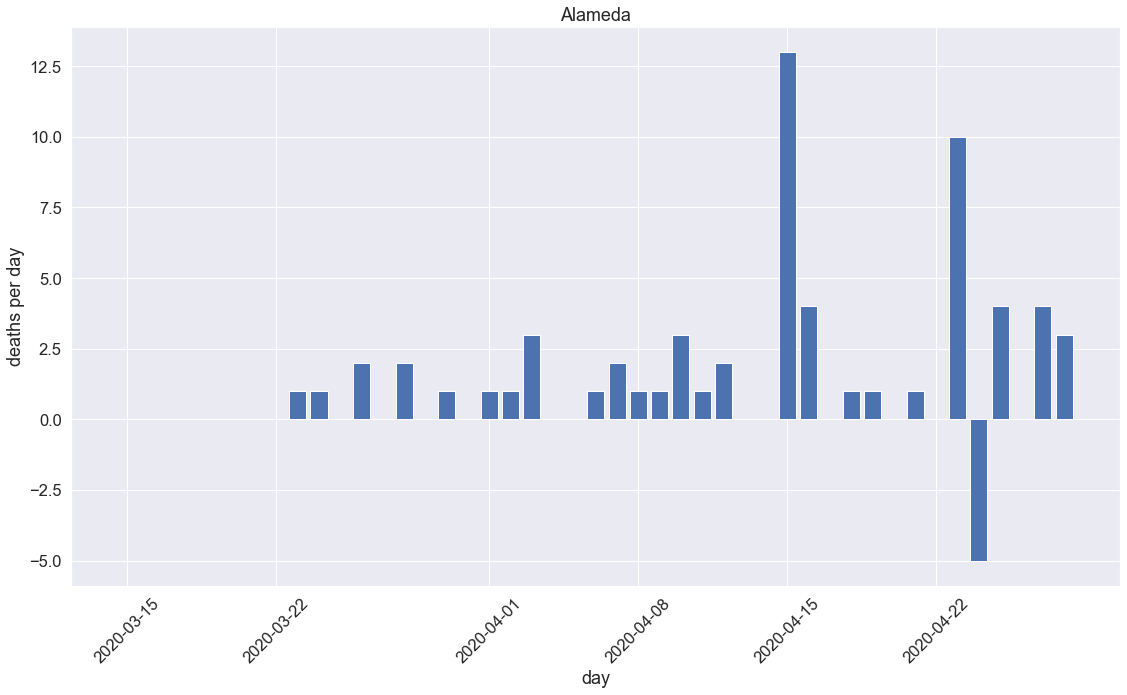

In [30]:
# starting from shelter in place, there were no deaths prior
f = plt.figure(figsize=(16, 10))
plt.bar(alameda[shelter_inplace:].index, np.diff(np.append(0, alameda[shelter_inplace:]['deaths'])))
plt.title('Alameda')
plt.ylabel('deaths per day')
plt.xlabel('day')
plt.xticks(rotation=45)
f.tight_layout()

### Hayward Gateway Nursing Home
On Tuesday, there were 11 deaths at a single nursing home in Alameda county. See [The Mercury News on April 14th](https://www.mercurynews.com/2020/04/14/coronavirus-two-more-nursing-home-deaths-in-alameda-county-including-elected-official/) for more information.

### Declining Counts
According to [NYTimes COVID-19 Data README](https://github.com/nytimes/covid-19-data#methodology-and-definitions): 

>In some cases, the number of cases or deaths for a state or county will decline. This can occur when a state or county corrects an error in the number of cases or deaths they've reported in the past, or when a state moves cases from one county to another. When we are able, we will historically revise counts for all impacted dates. In other cases, this will be reflected in a single-day drop in the number of cases or deaths.

So evidently Alameda county revised their counts on 4/23 and there is a single day drop in the number of deaths from 53 to 48 and back up to 52. This shows up as -5 in the daily deathtoll which is a correction by the county, not an indication that we are now suffering from a zombie apocalypse.

### License and Attribution
This tutorial uses data generously provided by the New York Times. Please read their [licenses & attribution requiremnets](https://github.com/nytimes/covid-19-data#license-and-attribution).